# Quick start

In [1]:
import numpy as np
import networkx as nx
import math
import time
import pickle as pkl
import scipy
import sys
sys.path.insert(0, '/home/azzolin/AHK')
import utils

from ahk import AHK_graphon
from ahk_generators import data_colors, ahk_sbm, sample_data

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

/home/azzolin/miniconda3/envs/digress2_clone/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
### Define an AHK model representing a stochastic block model:

colprobs = np.array([0.2, 0.3, 0.5]) #np.array([1])
edgeprobs = np.array([[0.6,0.1,0.1],[0.1,0.9,0.1],[0.1,0.1,0.8]])

# sbm = ahk_sbm(colprobs, edgeprobs, False)

In [27]:
### Sample random graphs from the model

# minnodes = 8
# maxnodes = 30
# samplesize = 5

# sample = sample_data(sbm,samplesize,minnodes,maxnodes)

### these sampled graphs are now instances of utils.World
### They are converted to networkx graphs for plotting

#
#for g in sample:
#    gnx=g.to_nx()
#    nodecols=(list(gnx.nodes()[j]['features'] for j in gnx.nodes()))
#    nx.draw_networkx(gnx,node_color=nodecols,cmap='Set3')
#    plt.show()


In [36]:
# g = sample[0]
# g = g.to_nx()
# g.nodes(data=True)
# g.edges(data=True)
# g = nx.Graph(g)
# g.edges()[(0,2)]["bici"] = 2
# g.edges(data=True)

In [39]:
# for g in range(5):
#     g = nx.stochastic_block_model([5, 5, 5], edgeprobs)
#     nx.draw_networkx(g, cmap='Set3')
#     plt.show()

## Learning

In [3]:
NUM_GRAPHS = 100

traindata = []
fmap = {
    "features": {
        0: 0,
        1: 1
    }
}
for _ in range(NUM_GRAPHS):
    g = nx.stochastic_block_model([5,5,5], edgeprobs)
    nx.set_node_attributes(g, 1, "features") # add required node feature by AHK
    g = utils.nx_to_world(g, featmaps=fmap)
    traindata.append(g)
g.sig.unaries


# Initializing a model. This requires to define the histogram partitioning of the [0,1] interval
# that the model uses
# The first argument in the constructor is the signature of the graphs we are dealing with, i.e.
# a specification of the attributes and relations


binbounds = utils.uni_bins(3)
model_learned = AHK_graphon(traindata[0].sig, binbounds)

# Defining settings:
settings={}
settings['num_pi_b']=50
settings['batchsize']=10
settings['soft']=0.01
settings['numepochs']=30
settings['learn_bins']=False
settings['early_stop']=5
settings['with_trace']=False

#Adam params:
settings['ad_alpha']=0.01
settings['ad_beta1']=0.99
settings['ad_beta2']=0.9
settings['ad_epsilon']=10e-8

settings['method']="adam"

In [4]:
# Random initialization and learning
model_learned.rand_init()
best, loglik, trace = model_learned.learn(settings, traindata)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


Epoch 1 log-lik:  -8806.942051330972 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


Epoch 2 log-lik:  -8098.030512003684 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


Epoch 3 log-lik:  -7637.16139650086 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


Epoch 4 log-lik:  -7295.819094064762 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


Epoch 5 log-lik:  -6936.06171733031 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


Epoch 6 log-lik:  -6634.949344902928 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


Epoch 7 log-lik:  -6476.461879854022 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


Epoch 8 log-lik:  -6476.203953600084 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Epoch 9 log-lik:  -6487.407953762534 early_stop:  5 noimprov:  1


100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Epoch 10 log-lik:  -6470.437641039041 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Epoch 11 log-lik:  -6450.793619056283 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Epoch 12 log-lik:  -6432.474774484823 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Epoch 13 log-lik:  -6379.523788061329 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Epoch 14 log-lik:  -6399.7562425099895 early_stop:  5 noimprov:  1


100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Epoch 15 log-lik:  -6333.297981487921 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


Epoch 16 log-lik:  -6326.511758919019 early_stop:  5 noimprov:  0


100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


Epoch 17 log-lik:  -6369.249538607017 early_stop:  5 noimprov:  1


100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


Epoch 18 log-lik:  -6393.282812879368 early_stop:  5 noimprov:  2


100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Epoch 19 log-lik:  -6380.869776749083 early_stop:  5 noimprov:  3


100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Epoch 20 log-lik:  -6405.44971400993 early_stop:  5 noimprov:  4


100%|██████████| 10/10 [00:22<00:00,  2.23s/it]

Epoch 21 log-lik:  -6366.833525892296 early_stop:  5 noimprov:  5


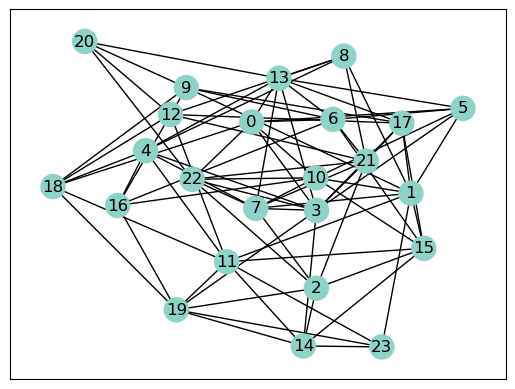

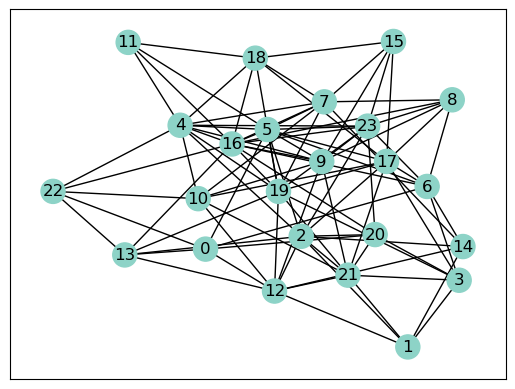

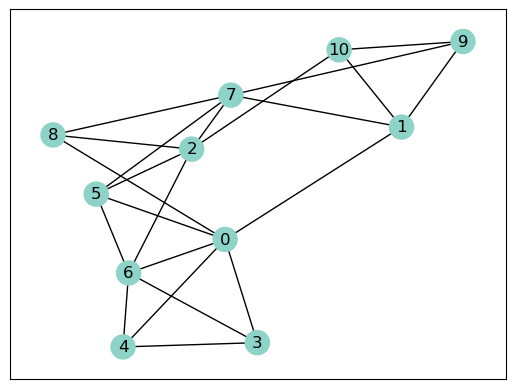

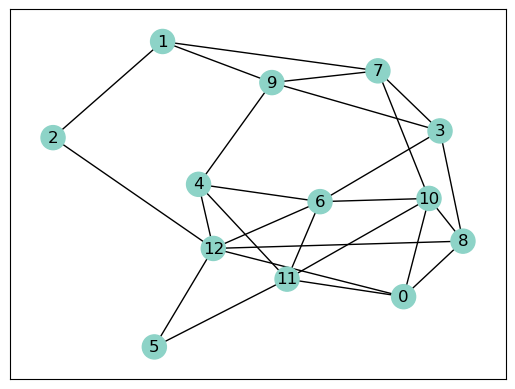

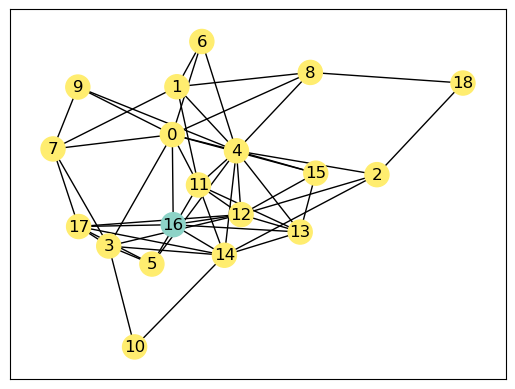

In [5]:
sample = sample_data(model_learned, 5, 5, 30)

for g in sample:
   gnx = g.to_nx()
   nodecols = (list(gnx.nodes()[j]['features'] for j in gnx.nodes()))
   nx.draw_networkx(gnx, node_color=nodecols, cmap='Set3')
   plt.show()